In [1]:
#library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandasql as sql
import numpy as np

In [2]:
data=pd.read_excel("/home/sd/Downloads/Effort_Data.xlsx")
data.head()

,ITILProcessType,Complexity,Effort,Service Domain type
0,Release Management,Medium,55,App suport
1,Release Management,Medium,55,App suport
2,Service Request,Medium,72,Database Support
3,Release Management,Medium,55,App suport
4,Release Management,Medium,55,App suport


In [3]:
# remove special characters and space in the column name
data.columns = data.columns.str.replace('[#]', '')
data.columns = data.columns.str.replace(' ', '')

,ITILProcessType,Complexity,Effort,ServiceDomaintype
0,Release Management,Medium,55,App suport
1,Release Management,Medium,55,App suport
2,Service Request,Medium,72,Database Support
3,Release Management,Medium,55,App suport
4,Release Management,Medium,55,App suport


## Data set and short descreption for numeric variable


In [4]:
data.Effort.describe()

count    6460.000000
mean       81.263777
std        84.607490
min         1.000000
25%        30.000000
50%        52.000000
75%       103.000000
max       646.000000
Name: Effort, dtype: float64

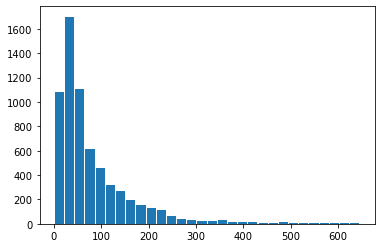

In [57]:
#histogram plot
x=data.Effort
plt.hist(x,bins=30,rwidth=.9)
plt.show()

#### comment: most of the work are less effort and very few work take very high effort. 
#### The histogram is positively Skewed.

## Domain Wise descreption

In [41]:
#total effort count
total_Effort=sql.sqldf("""
                        select sum(Effort)
                        from data""")

,ServiceDomaintype,count_ServiceDomaintype,percentage_servicedomain,sum_effort,percentage_effort,avarage_effort
0,Database Support,4080,63.157895,294729,56.142707,72
1,App suport,2380,36.842105,230235,43.857293,96


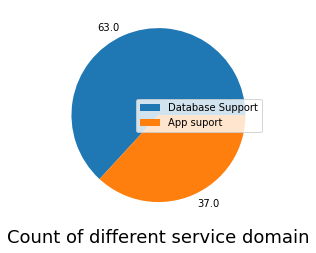

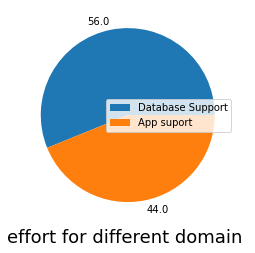

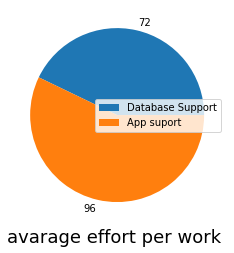

In [38]:
d=np.shape(data)[0]/100
different_NUM_ServiceDomaintype=sql.sqldf("""
                                            select ServiceDomaintype,count(ServiceDomaintype) as count_ServiceDomaintype
                                            ,count(ServiceDomaintype)/"""+str(d)+""" as percentage_servicedomain,sum(Effort) as sum_effort,sum(Effort)/5249.64 as percentage_effort
                                            ,sum(Effort)/count(ServiceDomaintype) as avarage_effort
                                            from data
                                            group by ServiceDomaintype
                                            order by count_ServiceDomaintype desc""")
display(different_NUM_ServiceDomaintype)


# pie chart of total count Service Domain type

x=different_NUM_ServiceDomaintype.count_ServiceDomaintype
y=different_NUM_ServiceDomaintype.ServiceDomaintype
z=round(different_NUM_ServiceDomaintype.percentage_servicedomain)
plt.pie(x, labels = z)
plt.legend(y,loc=7)
plt.xlabel("Count of different service domain",fontsize=18)
plt.show()


#pie chart of sum of effort of Service Domain type
x=different_NUM_ServiceDomaintype.sum_effort 
y=different_NUM_ServiceDomaintype.ServiceDomaintype
z=round(different_NUM_ServiceDomaintype.percentage_effort)
plt.pie(x, labels = z)
plt.legend(y,loc=7)
plt.xlabel("effort for different domain ",fontsize=18)
plt.show()

 
# pie chart of avarage effort of per domain
x=different_NUM_ServiceDomaintype.avarage_effort
y=different_NUM_ServiceDomaintype.ServiceDomaintype

plt.pie(x, labels = x)
plt.legend(y,loc=7)
plt.xlabel("avarage effort per work ",fontsize=18)
plt.show()

### comment: Avarage effort for Database Support service domain is less compare to App Support service domain. Although there are approxmately 70% more work in Database support (in count) than App Support domain.






#  

# Box plot of effort

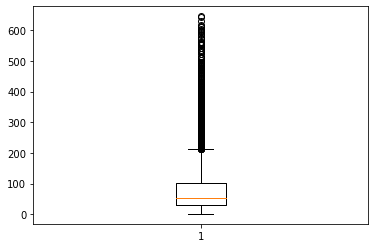

In [42]:
x=data.Effort
plt.boxplot(x)
plt.show()

### There are many upper outliers that means there are small number of works which takes more time compare to other work. 

## Outliers Identification

In [9]:
#IQR=Q_3-Q_1
Q_3=103.000000
Q_1=30.000000
IQR=Q_3-Q_1
uper_outlayers=Q_3+1.5*IQR
display(uper_outlayers)
lower_outlayers=Q_1-1.5*IQR
display(lower_outlayers)

212.5

-79.5

In [47]:
# Table restricted to outlier data
outlayers=sql.sqldf("""
                        select*from data
                        where Effort>""" +str(uper_outlayers)
                    +""" ;""")
print("Table of outlayer is as follows")

display(outlayers)
print("""


""")
percentage_of_outlier=(100*np.shape(outlayers)[0])/(np.shape(data)[0])
print("Percentage of outlayer values is approxmately "+str(round(percentage_of_outlier)))

print("""


""")


Table of outlayer is as follows


,ITILProcessType,Complexity,Effort,ServiceDomaintype
0,Service Request,Medium,605,App suport
1,Release Management,Medium,511,App suport
2,Service Request,Medium,258,App suport
3,Service Request,Medium,410,App suport
4,Incident Management,Medium,225,App suport
...,...,...,...,...
436,Service Request,Simple,238,App suport
437,Service Request,Simple,236,Database Support
438,Incident Management,Medium,314,Database Support
439,Incident Management,Complex,360,Database Support


Percentage of outlayer values is approxmately 7


In [ ]:
# Table restricted to outlier data and App suuupport service domain
outlayers_ITILProcessType_appsupport=sql.sqldf(""" 
                                    select ITILProcessType as ITILProcessType_appsupport_Support,count(ITILProcessType),sum(Effort)
                                    from outlayers
                                    where ServiceDomaintype="App suport"
                                    group by ITILProcessType 
                                    """)
display(outlayers_ITILProcessType_appsupport)
percentage_of_outlier_came_from_appsummpot=(100*np.shape(outlayers)[0])/(np.shape(outlayers)[0])
print("Percentage of outlayer values is approxmately "+str(round(percentage_of_outlier)))

In [ ]:
outlayers_ITILProcessType_Database_Support=sql.sqldf(""" 
                                    select ITILProcessType as ITILProcessType_Database_Support ,count(ITILProcessType),sum(Effort)
                                    from outlayers
                                    where ServiceDomaintype="Database Support"
                                    group by ITILProcessType 
                                    """)
display(outlayers_ITILProcessType_Database_Support)

In [ ]:
outlayers_count_complexcity=sql.sqldf("""
                        select Complexity  as complexcity_outlayer,count(Complexity) as count_complexcity,sum(Effort),(sum(Effort)/count(Complexity)) as avg_effort
                        from data
                        where Effort>""" +str(uper_outlayers)          
                    +""" group by Complexity order by count_complexcity desc ;""")
display(outlayers_count_complexcity)
